<a href="https://colab.research.google.com/github/hbhb0311/Study/blob/main/Pytorch/PART2-DNN/BatchNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
# parameters
learning_rate = 0.01
training_epochs = 10
batch_size = 32

In [5]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [10]:
# dataset loader
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

test_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          drop_last=True)

In [11]:
# nn layers 
linear1 = torch.nn.Linear(784, 32, bias=True)
linear2 = torch.nn.Linear(32, 32, bias=True)
linear3 = torch.nn.Linear(32, 10, bias=True)
relu = torch.nn.ReLU()
bn1 = torch.nn.BatchNorm1d(32)
bn2 = torch.nn.BatchNorm1d(32)

nn_linear1 = torch.nn.Linear(784, 32, bias=True)
nn_linear2 = torch.nn.Linear(32, 32, bias=True)
nn_linear3 = torch.nn.Linear(32, 10, bias=True)

In [12]:
# Initialization 
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)

Parameter containing:
tensor([[ 0.1682, -0.3733,  0.3583, -0.0065, -0.1717,  0.2067, -0.0524,  0.1423,
          0.0302, -0.0190, -0.2152, -0.0658,  0.0707, -0.1384, -0.2849, -0.1592,
          0.3328,  0.3155, -0.1892, -0.2218,  0.1492, -0.1354,  0.3767,  0.2382,
          0.1038,  0.3057,  0.0419, -0.0506, -0.1961,  0.2350, -0.1850, -0.3401],
        [ 0.2644,  0.3385, -0.3467, -0.1503,  0.0154,  0.2522, -0.3246,  0.2218,
         -0.0132, -0.0579, -0.0195, -0.1027, -0.3766, -0.3664,  0.3384, -0.2816,
          0.0922, -0.3290,  0.3227,  0.0937,  0.1951,  0.2181,  0.1866, -0.2062,
         -0.0285,  0.2953,  0.3605,  0.0809,  0.1879, -0.1290,  0.1673, -0.2343],
        [-0.1524,  0.1951,  0.2442,  0.3352, -0.0066, -0.1022,  0.3737,  0.2646,
          0.3526, -0.2553,  0.2317, -0.1112,  0.1188,  0.0283,  0.0051,  0.1175,
          0.3175, -0.0689, -0.1076, -0.2841, -0.1308, -0.0477, -0.3273,  0.3327,
         -0.1557,  0.2050,  0.1946, -0.3361,  0.0326,  0.3201, -0.0665, -0.1992],
   

In [14]:
# 모델 2가지 사용해 비교하기
bn_model = torch.nn.Sequential(linear1, bn1, relu,
                               linear2, bn2, relu,
                               linear3).to(device)

nn_model = torch.nn.Sequential(nn_linear1, relu, 
                               nn_linear2, relu, 
                               nn_linear3).to(device)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)

bn_optimizer = torch.optim.Adam(bn_model.parameters(), lr = learning_rate)
nn_optimizer = torch.optim.Adam(nn_model.parameters(), lr = learning_rate)


train_losses = []
train_accs = []

valid_losses = []
valid_accs = []

train_total_batch = len(train_loader)
test_total_batch = len(test_loader)

for epoch in range(training_epochs):
    bn_model.train()
    
    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
        # [batch_size, 1, 28, 28] = reshape => [batch_size, 784]
        
        bn_optimizer.zero_grad()
        bn_prediction = bn_model(X)
        bn_loss = criterion(bn_prediction, Y)
        bn_loss.backward()
        bn_optimizer.step()

        nn_optimizer.zero_grad()
        nn_prediction = nn_model(X)
        nn_loss = criterion(nn_prediction, Y)
        nn_loss.backward()
        nn_optimizer.step()
        
    with torch.no_grad():
        bn_model.eval()    

        # Test the model using train sets
        bn_loss, nn_loss, bn_acc, nn_acc = 0, 0, 0, 0
        for i, (X, Y) in enumerate(train_loader):
            X = X.view(-1, 28 * 28).to(device)
            Y = Y.to(device)

            bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, nn_loss, bn_acc, nn_acc = bn_loss / train_total_batch, nn_loss / train_total_batch, bn_acc / train_total_batch, nn_acc / train_total_batch

        train_losses.append([bn_loss, nn_loss])
        train_accs.append([bn_acc, nn_acc])

        print('[Epoch %d-TRAIN] Batchnorm Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs No Batchnorm Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)' 
              % ((epoch + 1), bn_loss.item(), bn_acc.item(), nn_loss.item(), nn_acc.item()))
        
        # Test the model using test sets
        bn_loss, nn_loss, bn_acc, nn_acc = 0, 0, 0, 0
        for i, (X, Y) in enumerate(test_loader):
            X = X.view(-1, 28 * 28).to(device)
            Y = Y.to(device)

            bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, nn_loss, bn_acc, nn_acc = bn_loss / test_total_batch, nn_loss / test_total_batch, bn_acc / test_total_batch, nn_acc / test_total_batch

        # Save valid losses/acc
        valid_losses.append([bn_loss, nn_loss])
        valid_accs.append([bn_acc, nn_acc])
        print('[Epoch %d-VALID] Batchnorm Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs No Batchnorm Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)' 
              % ((epoch + 1), bn_loss.item(), bn_acc.item(), nn_loss.item(), nn_acc.item()))
        print()

[Epoch 1-TRAIN] Batchnorm Loss(Acc): bn_loss:0.10013(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.20535(nn_acc:0.94)
[Epoch 1-VALID] Batchnorm Loss(Acc): bn_loss:0.11058(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.24073(nn_acc:0.94)

[Epoch 2-TRAIN] Batchnorm Loss(Acc): bn_loss:0.08667(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.15204(nn_acc:0.96)
[Epoch 2-VALID] Batchnorm Loss(Acc): bn_loss:0.11032(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.18295(nn_acc:0.95)

[Epoch 3-TRAIN] Batchnorm Loss(Acc): bn_loss:0.07089(bn_acc:0.98) vs No Batchnorm Loss(Acc): nn_loss:0.14080(nn_acc:0.96)
[Epoch 3-VALID] Batchnorm Loss(Acc): bn_loss:0.10316(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.19705(nn_acc:0.95)

[Epoch 4-TRAIN] Batchnorm Loss(Acc): bn_loss:0.06587(bn_acc:0.98) vs No Batchnorm Loss(Acc): nn_loss:0.14111(nn_acc:0.96)
[Epoch 4-VALID] Batchnorm Loss(Acc): bn_loss:0.09406(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.18560(nn_acc:0.95)

[Epoch 5-TRAIN] Batc

In [15]:
import matplotlib.pylab as plt

def plot_compare(loss_list: list, ylim=None, title=None) -> None:
    bn = [i[0] for i in loss_list]
    nn = [i[1] for i in loss_list]

    plt.figure(figsize=(15, 10))
    plt.plot(bn, label='With BN')
    plt.plot(nn, label='Without BN')
    if ylim:
        plt.ylim(ylim)

    if title:
        plt.title(title)
    plt.legend()
    plt.grid('on')
    plt.show()

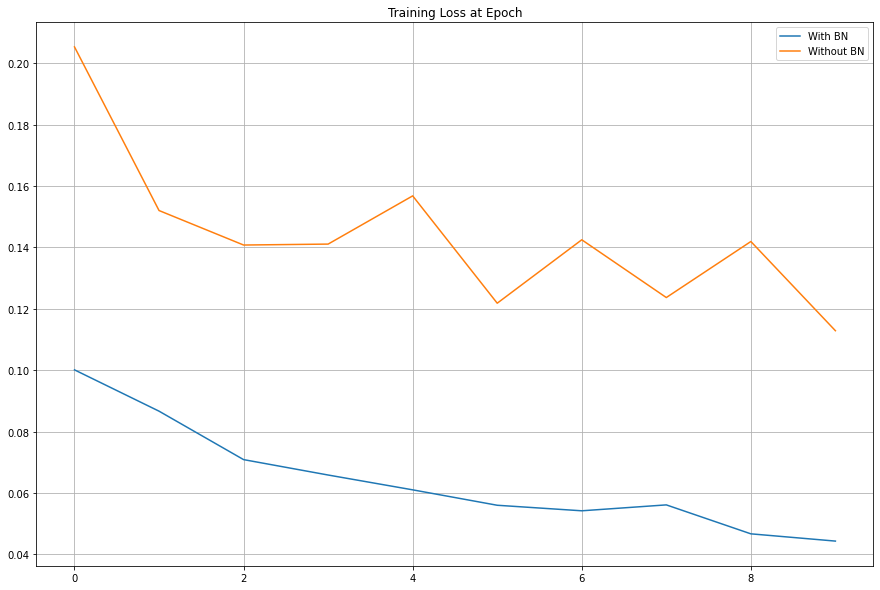

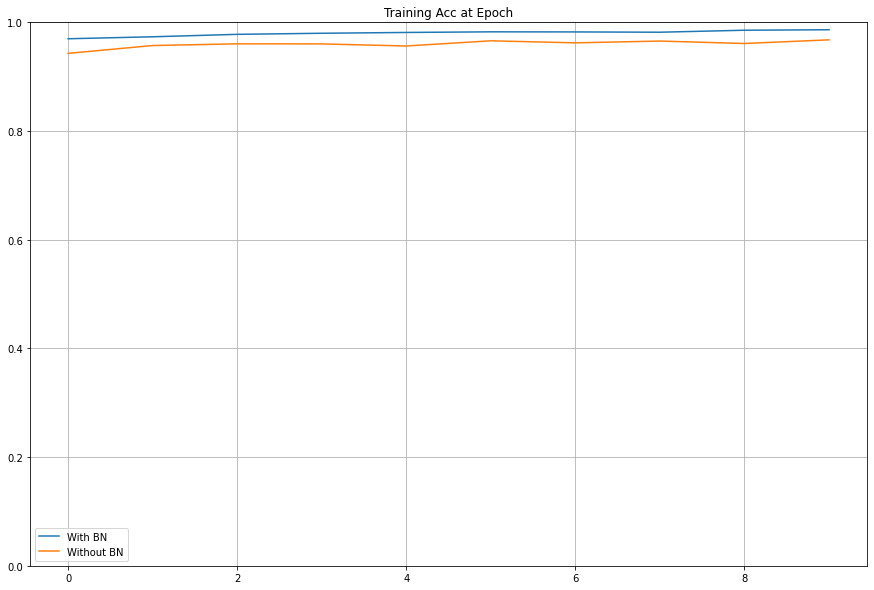

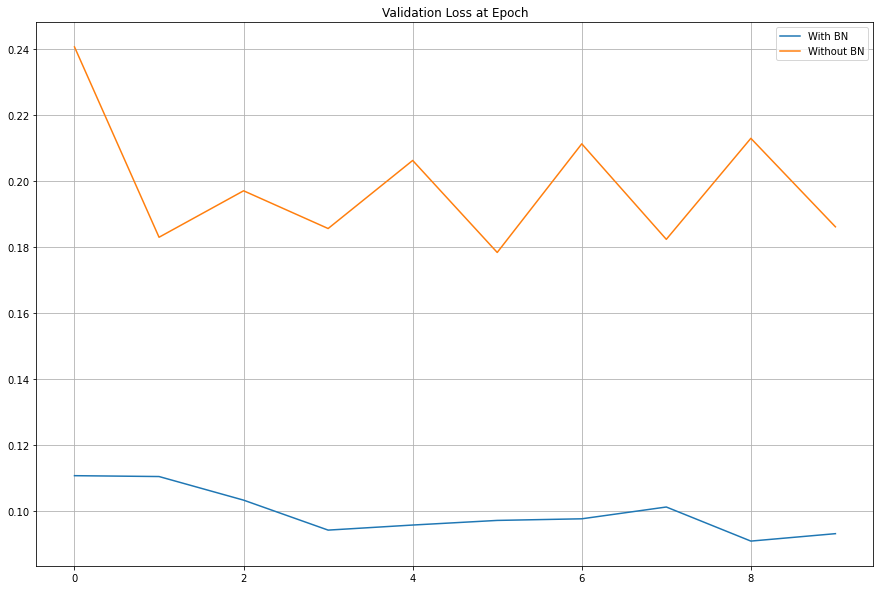

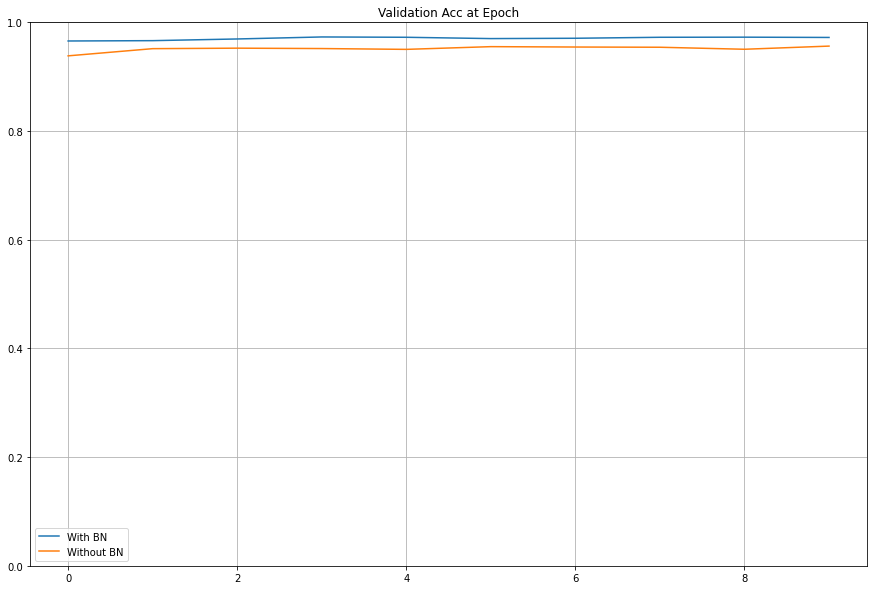

In [16]:
plot_compare(train_losses, title='Training Loss at Epoch')
plot_compare(train_accs, [0, 1.0], title='Training Acc at Epoch')
plot_compare(valid_losses, title='Validation Loss at Epoch')
plot_compare(valid_accs, [0, 1.0], title='Validation Acc at Epoch')